In [1]:
   from google.colab import drive

   drive.mount('/content/drive')

Mounted at /content/drive


# Varying epochs from 10 to 70

Epoch 1/10
48/48 [==============================] - 2s 13ms/step - loss: 2.3478e-04 - val_loss: 2.8992e-04
Epoch 2/10
48/48 [==============================] - 0s 8ms/step - loss: 2.2744e-04 - val_loss: 2.8865e-04
Epoch 3/10
48/48 [==============================] - 0s 8ms/step - loss: 2.2349e-04 - val_loss: 2.8853e-04
Epoch 4/10
48/48 [==============================] - 0s 8ms/step - loss: 2.2292e-04 - val_loss: 2.8917e-04
Epoch 5/10
48/48 [==============================] - 0s 7ms/step - loss: 2.3194e-04 - val_loss: 2.8934e-04
Epoch 6/10
48/48 [==============================] - 0s 7ms/step - loss: 2.2584e-04 - val_loss: 2.9835e-04
Epoch 7/10
48/48 [==============================] - 0s 7ms/step - loss: 2.2625e-04 - val_loss: 2.9523e-04
Epoch 8/10
48/48 [==============================] - 0s 8ms/step - loss: 2.2523e-04 - val_loss: 2.9130e-04
Epoch 9/10
48/48 [==============================] - 0s 8ms/step - loss: 2.2411e-04 - val_loss: 2.9197e-04
Epoch 10/10
12/12 [==========================

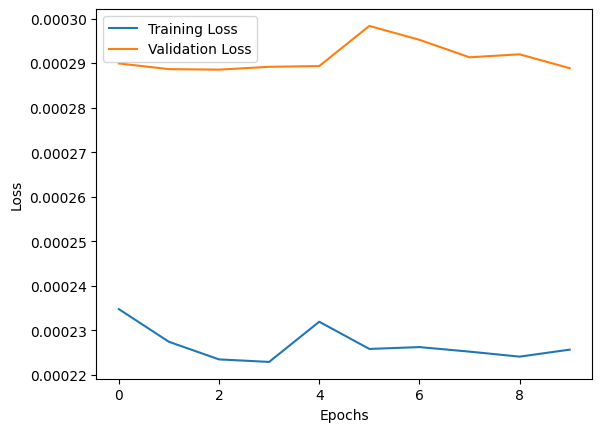

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
48/48 [==============================] - 4s 30ms/step - loss: 2.6073e-04 - val_loss: 2.4367e-04
Epoch 2/20
48/48 [==============================] - 0s 9ms/step - loss: 2.4042e-04 - val_loss: 2.3314e-04
Epoch 3/20
48/48 [==============================] - 0s 8ms/step - loss: 2.3745e-04 - val_loss: 2.3181e-04
Epoch 4/20
48/48 [==============================] - 0s 9ms/step - loss: 2.3864e-04 - val_loss: 2.3018e-04
Epoch 5/20
48/48 [==============================] - 0s 8ms/step - loss: 2.3574e-04 - val_loss: 2.3506e-04
Epoch 6/20
48/48 [==============================] - 0s 8ms/step - loss: 2.4036e-04 - val_loss: 2.3348e-04
Epoch 7/20
48/48 [==============================] - 0s 9ms/step - loss: 2.3598e-04 - val_loss: 2.3098e-04
Epoch 8/20
48/48 [==============================] - 0s 8ms/step - loss: 2.3602e-04 - val_loss: 2.3487e-04
Epoch 9/20
48/48 [==============================] - 0s 8ms/step - loss: 2.4253e-04 - val_loss: 2.4215e-04
Epoch 10/20
48/48 [==========================

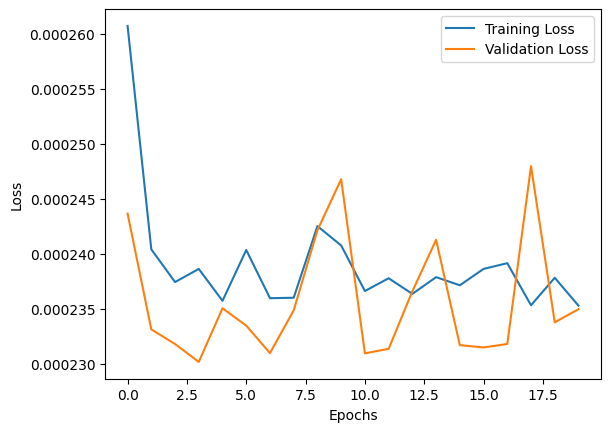

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1029)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 2s 19ms/step - loss: 2.5159e-04 - val_loss: 2.2744e-04
Epoch 2/30
48/48 [==============================] - 0s 10ms/step - loss: 2.4617e-04 - val_loss: 2.1559e-04
Epoch 3/30
48/48 [==============================] - 0s 10ms/step - loss: 2.4086e-04 - val_loss: 2.4404e-04
Epoch 4/30
48/48 [==============================] - 0s 10ms/step - loss: 2.5560e-04 - val_loss: 2.1646e-04
Epoch 5/30
48/48 [==============================] - 1s 11ms/step - loss: 2.4235e-04 - val_loss: 2.1563e-04
Epoch 6/30
48/48 [==============================] - 0s 10ms/step - loss: 2.4221e-04 - val_loss: 2.4075e-04
Epoch 7/30
48/48 [==============================] - 0s 10ms/step - loss: 2.4193e-04 - val_loss: 2.1445e-04
Epoch 8/30
48/48 [==============================] - 0s 7ms/step - loss: 2.4019e-04 - val_loss: 2.4200e-04
Epoch 9/30
48/48 [==============================] - 0s 8ms/step - loss: 2.4588e-04 - val_loss: 2.1398e-04
Epoch 10/30
48/48 [====================

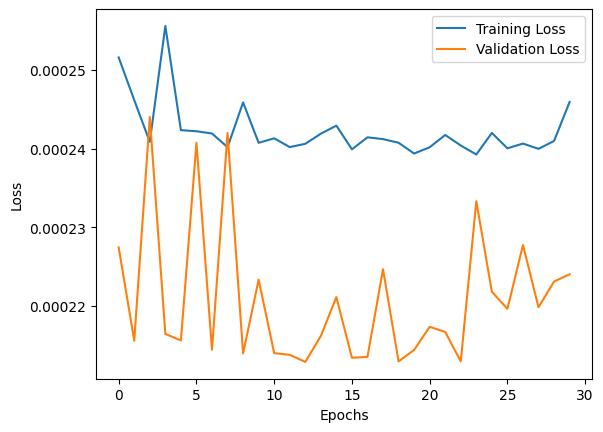

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1037)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/40
48/48 [==============================] - 5s 31ms/step - loss: 2.6623e-04 - val_loss: 2.3576e-04
Epoch 2/40
48/48 [==============================] - 1s 17ms/step - loss: 2.4507e-04 - val_loss: 2.2182e-04
Epoch 3/40
48/48 [==============================] - 1s 16ms/step - loss: 2.4047e-04 - val_loss: 2.4713e-04
Epoch 4/40
48/48 [==============================] - 1s 17ms/step - loss: 2.4644e-04 - val_loss: 2.2611e-04
Epoch 5/40
48/48 [==============================] - 1s 10ms/step - loss: 2.5048e-04 - val_loss: 2.3302e-04
Epoch 6/40
48/48 [==============================] - 1s 10ms/step - loss: 2.4080e-04 - val_loss: 2.2162e-04
Epoch 7/40
48/48 [==============================] - 1s 11ms/step - loss: 2.4159e-04 - val_loss: 2.2053e-04
Epoch 8/40
48/48 [==============================] - 1s 11ms/step - loss: 2.3921e-04 - val_loss: 2.2398e-04
Epoch 9/40
48/48 [==============================] - 0s 10ms/step - loss: 2.3903e-04 - val_loss: 2.2469e-04
Epoch 10/40
48/48 [==================

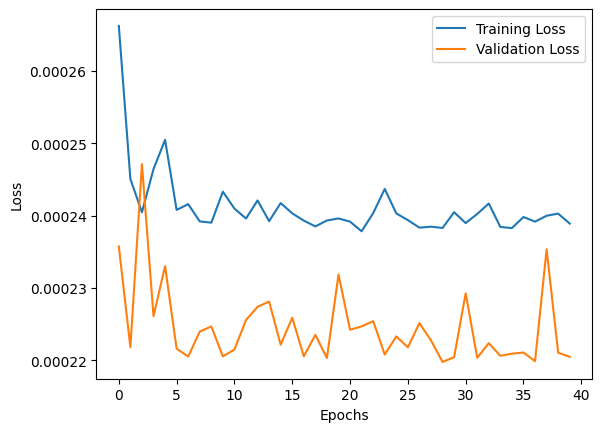

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
48/48 [==============================] - 3s 18ms/step - loss: 2.7069e-04 - val_loss: 2.1823e-04
Epoch 2/50
48/48 [==============================] - 1s 11ms/step - loss: 2.4674e-04 - val_loss: 2.0560e-04
Epoch 3/50
48/48 [==============================] - 1s 11ms/step - loss: 2.5295e-04 - val_loss: 2.0802e-04
Epoch 4/50
48/48 [==============================] - 0s 10ms/step - loss: 2.4294e-04 - val_loss: 2.0618e-04
Epoch 5/50
48/48 [==============================] - 1s 11ms/step - loss: 2.4207e-04 - val_loss: 2.0566e-04
Epoch 6/50
48/48 [==============================] - 1s 11ms/step - loss: 2.4569e-04 - val_loss: 2.1742e-04
Epoch 7/50
48/48 [==============================] - 1s 11ms/step - loss: 2.4969e-04 - val_loss: 2.0620e-04
Epoch 8/50
48/48 [==============================] - 0s 9ms/step - loss: 2.4710e-04 - val_loss: 2.0816e-04
Epoch 9/50
48/48 [==============================] - 0s 8ms/step - loss: 2.4338e-04 - val_loss: 2.0794e-04
Epoch 10/50
48/48 [====================

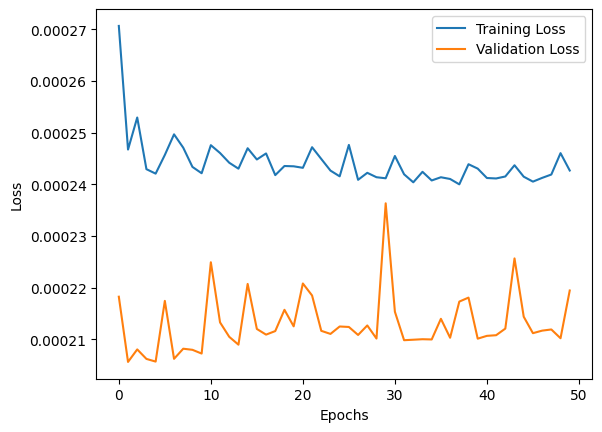

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1052)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/60
48/48 [==============================] - 5s 18ms/step - loss: 2.7384e-04 - val_loss: 1.7951e-04
Epoch 2/60
48/48 [==============================] - 0s 8ms/step - loss: 2.5176e-04 - val_loss: 1.7789e-04
Epoch 3/60
48/48 [==============================] - 0s 9ms/step - loss: 2.6055e-04 - val_loss: 1.8379e-04
Epoch 4/60
48/48 [==============================] - 0s 9ms/step - loss: 2.4917e-04 - val_loss: 1.8306e-04
Epoch 5/60
48/48 [==============================] - 0s 8ms/step - loss: 2.5593e-04 - val_loss: 1.7779e-04
Epoch 6/60
48/48 [==============================] - 0s 8ms/step - loss: 2.5069e-04 - val_loss: 1.7895e-04
Epoch 7/60
48/48 [==============================] - 0s 8ms/step - loss: 2.5787e-04 - val_loss: 2.1218e-04
Epoch 8/60
48/48 [==============================] - 0s 8ms/step - loss: 2.6054e-04 - val_loss: 1.9294e-04
Epoch 9/60
48/48 [==============================] - 0s 9ms/step - loss: 2.5049e-04 - val_loss: 1.7994e-04
Epoch 10/60
48/48 [==========================

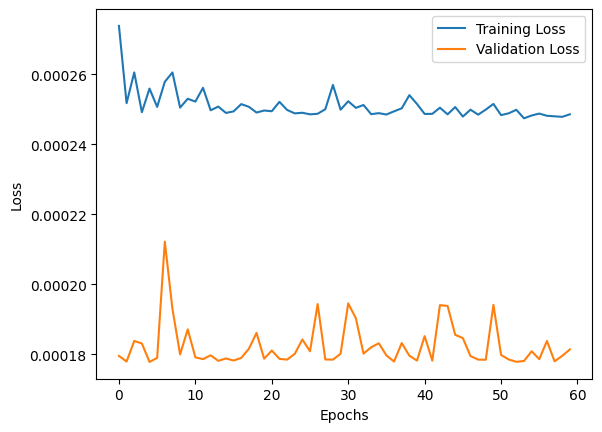

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1062)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/70
48/48 [==============================] - 3s 13ms/step - loss: 2.7988e-04 - val_loss: 1.4821e-04
Epoch 2/70
48/48 [==============================] - 0s 8ms/step - loss: 2.5893e-04 - val_loss: 1.7817e-04
Epoch 3/70
48/48 [==============================] - 0s 7ms/step - loss: 2.7965e-04 - val_loss: 1.6169e-04
Epoch 4/70
48/48 [==============================] - 0s 8ms/step - loss: 2.6623e-04 - val_loss: 1.5266e-04
Epoch 5/70
48/48 [==============================] - 0s 8ms/step - loss: 2.5884e-04 - val_loss: 1.6557e-04
Epoch 6/70
48/48 [==============================] - 0s 7ms/step - loss: 2.6040e-04 - val_loss: 1.5119e-04
Epoch 7/70
48/48 [==============================] - 0s 8ms/step - loss: 2.6351e-04 - val_loss: 1.4850e-04
Epoch 8/70
48/48 [==============================] - 0s 8ms/step - loss: 2.5924e-04 - val_loss: 1.4915e-04
Epoch 9/70
48/48 [==============================] - 0s 7ms/step - loss: 2.6063e-04 - val_loss: 1.4899e-04
Epoch 10/70
48/48 [==========================

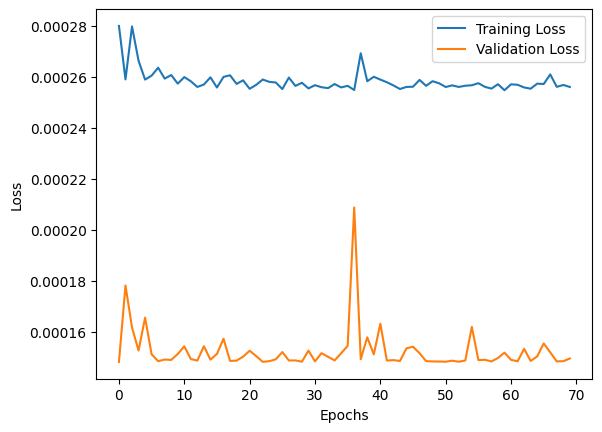

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1071)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Varying Sequence Lengths

Epoch 1/30
49/49 [==============================] - 2s 11ms/step - loss: 2.2214e-04 - val_loss: 3.2609e-04
Epoch 2/30
49/49 [==============================] - 0s 5ms/step - loss: 2.1778e-04 - val_loss: 3.4598e-04
Epoch 3/30
49/49 [==============================] - 0s 5ms/step - loss: 2.2752e-04 - val_loss: 3.3112e-04
Epoch 4/30
49/49 [==============================] - 0s 8ms/step - loss: 2.1467e-04 - val_loss: 3.2333e-04
Epoch 5/30
49/49 [==============================] - 0s 7ms/step - loss: 2.1606e-04 - val_loss: 3.2829e-04
Epoch 6/30
49/49 [==============================] - 0s 7ms/step - loss: 2.1754e-04 - val_loss: 3.2049e-04
Epoch 7/30
49/49 [==============================] - 0s 8ms/step - loss: 2.1643e-04 - val_loss: 3.2200e-04
Epoch 8/30
49/49 [==============================] - 0s 8ms/step - loss: 2.1843e-04 - val_loss: 3.2095e-04
Epoch 9/30
49/49 [==============================] - 0s 7ms/step - loss: 2.1598e-04 - val_loss: 3.2351e-04
Epoch 10/30
49/49 [==========================

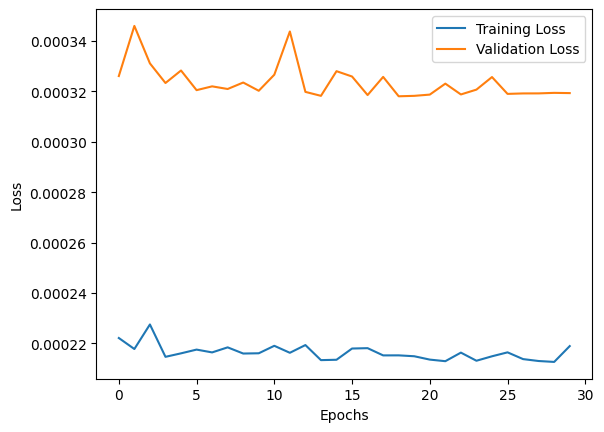

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 10  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20111)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 2s 13ms/step - loss: 2.3787e-04 - val_loss: 3.1047e-04
Epoch 2/30
48/48 [==============================] - 0s 7ms/step - loss: 2.2465e-04 - val_loss: 3.1246e-04
Epoch 3/30
48/48 [==============================] - 0s 8ms/step - loss: 2.1953e-04 - val_loss: 3.1302e-04
Epoch 4/30
48/48 [==============================] - 0s 8ms/step - loss: 2.1754e-04 - val_loss: 3.1176e-04
Epoch 5/30
48/48 [==============================] - 0s 7ms/step - loss: 2.1883e-04 - val_loss: 3.1210e-04
Epoch 6/30
48/48 [==============================] - 0s 7ms/step - loss: 2.1585e-04 - val_loss: 3.1986e-04
Epoch 7/30
48/48 [==============================] - 0s 7ms/step - loss: 2.2318e-04 - val_loss: 3.1249e-04
Epoch 8/30
48/48 [==============================] - 0s 7ms/step - loss: 2.1835e-04 - val_loss: 3.0892e-04
Epoch 9/30
48/48 [==============================] - 0s 7ms/step - loss: 2.2782e-04 - val_loss: 3.1411e-04
Epoch 10/30
48/48 [==========================

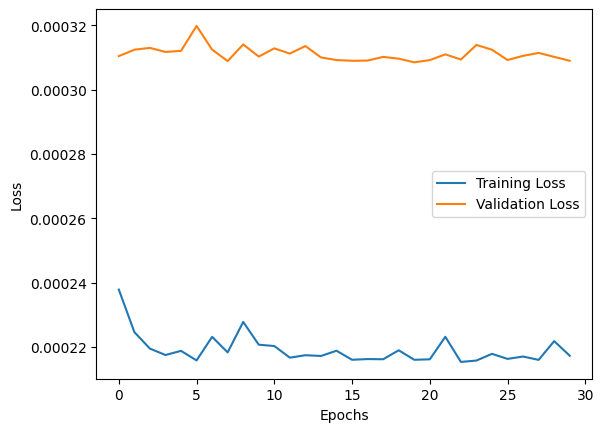

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20297)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 5s 36ms/step - loss: 2.3338e-04 - val_loss: 2.9782e-04
Epoch 2/30
48/48 [==============================] - 1s 14ms/step - loss: 2.2345e-04 - val_loss: 2.9948e-04
Epoch 3/30
48/48 [==============================] - 1s 14ms/step - loss: 2.1934e-04 - val_loss: 3.1207e-04
Epoch 4/30
48/48 [==============================] - 1s 14ms/step - loss: 2.1972e-04 - val_loss: 3.0857e-04
Epoch 5/30
48/48 [==============================] - 1s 14ms/step - loss: 2.2425e-04 - val_loss: 3.2088e-04
Epoch 6/30
48/48 [==============================] - 1s 14ms/step - loss: 2.2185e-04 - val_loss: 3.0854e-04
Epoch 7/30
48/48 [==============================] - 1s 14ms/step - loss: 2.2563e-04 - val_loss: 3.1042e-04
Epoch 8/30
48/48 [==============================] - 1s 14ms/step - loss: 2.2309e-04 - val_loss: 3.0105e-04
Epoch 9/30
48/48 [==============================] - 1s 15ms/step - loss: 2.2022e-04 - val_loss: 3.0694e-04
Epoch 10/30
48/48 [==================

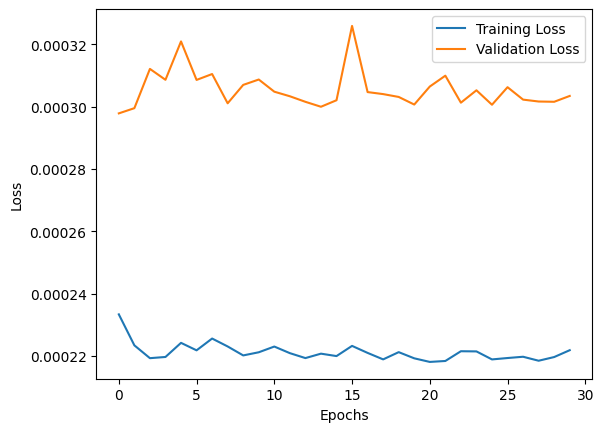

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 30  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=203)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 6s 45ms/step - loss: 2.6435e-04 - val_loss: 2.5724e-04
Epoch 2/30
48/48 [==============================] - 2s 33ms/step - loss: 2.3403e-04 - val_loss: 2.5883e-04
Epoch 3/30
48/48 [==============================] - 1s 25ms/step - loss: 2.3726e-04 - val_loss: 2.7637e-04
Epoch 4/30
48/48 [==============================] - 1s 21ms/step - loss: 2.4679e-04 - val_loss: 2.6744e-04
Epoch 5/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3233e-04 - val_loss: 2.6703e-04
Epoch 6/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3334e-04 - val_loss: 2.8441e-04
Epoch 7/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3504e-04 - val_loss: 2.7452e-04
Epoch 8/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3173e-04 - val_loss: 2.6411e-04
Epoch 9/30
48/48 [==============================] - 1s 21ms/step - loss: 2.3174e-04 - val_loss: 2.7503e-04
Epoch 10/30
48/48 [==================

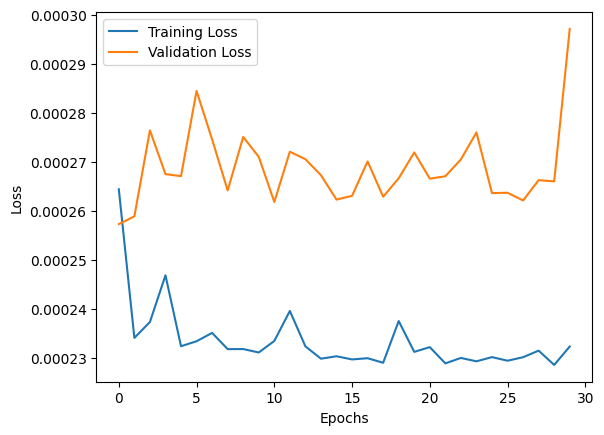

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 40  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=204)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 4s 32ms/step - loss: 2.4988e-04 - val_loss: 2.3892e-04
Epoch 2/30
48/48 [==============================] - 1s 16ms/step - loss: 2.5262e-04 - val_loss: 2.3198e-04
Epoch 3/30
48/48 [==============================] - 1s 15ms/step - loss: 2.4045e-04 - val_loss: 2.3431e-04
Epoch 4/30
48/48 [==============================] - 1s 15ms/step - loss: 2.4014e-04 - val_loss: 2.3431e-04
Epoch 5/30
48/48 [==============================] - 1s 16ms/step - loss: 2.4742e-04 - val_loss: 2.2793e-04
Epoch 6/30
48/48 [==============================] - 1s 15ms/step - loss: 2.4352e-04 - val_loss: 2.3390e-04
Epoch 7/30
48/48 [==============================] - 1s 20ms/step - loss: 2.4133e-04 - val_loss: 2.2897e-04
Epoch 8/30
48/48 [==============================] - 1s 21ms/step - loss: 2.3907e-04 - val_loss: 2.3334e-04
Epoch 9/30
48/48 [==============================] - 1s 22ms/step - loss: 2.4343e-04 - val_loss: 2.2856e-04
Epoch 10/30
48/48 [==================

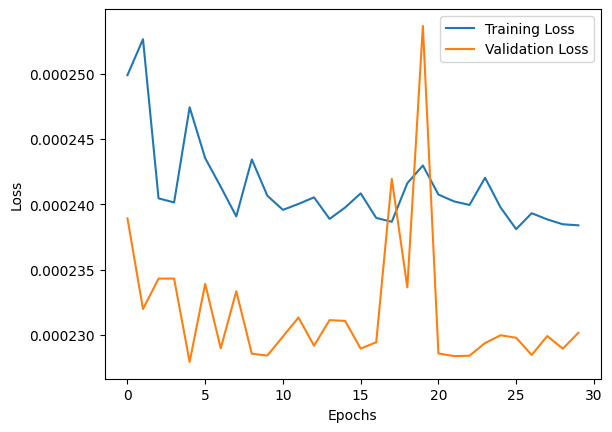

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 50  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2055)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
47/47 [==============================] - 5s 57ms/step - loss: 2.5371e-04 - val_loss: 2.0316e-04
Epoch 2/30
47/47 [==============================] - 2s 40ms/step - loss: 2.5235e-04 - val_loss: 2.0811e-04
Epoch 3/30
47/47 [==============================] - 2s 44ms/step - loss: 2.5498e-04 - val_loss: 2.0877e-04
Epoch 4/30
47/47 [==============================] - 1s 29ms/step - loss: 2.5464e-04 - val_loss: 2.3118e-04
Epoch 5/30
47/47 [==============================] - 1s 25ms/step - loss: 2.5129e-04 - val_loss: 2.0649e-04
Epoch 6/30
47/47 [==============================] - 1s 25ms/step - loss: 2.5021e-04 - val_loss: 2.0877e-04
Epoch 7/30
47/47 [==============================] - 1s 26ms/step - loss: 2.4728e-04 - val_loss: 2.0479e-04
Epoch 8/30
47/47 [==============================] - 1s 25ms/step - loss: 2.4674e-04 - val_loss: 2.0513e-04
Epoch 9/30
47/47 [==============================] - 1s 26ms/step - loss: 2.4907e-04 - val_loss: 2.0533e-04
Epoch 10/30
47/47 [==================

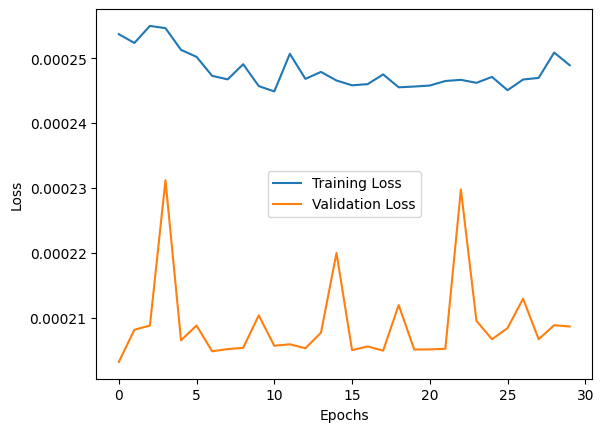

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 60  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=206)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
47/47 [==============================] - 4s 27ms/step - loss: 2.5420e-04 - val_loss: 2.4647e-04
Epoch 2/30
47/47 [==============================] - 1s 21ms/step - loss: 2.4866e-04 - val_loss: 3.3224e-04
Epoch 3/30
47/47 [==============================] - 1s 21ms/step - loss: 2.4585e-04 - val_loss: 2.5930e-04
Epoch 4/30
47/47 [==============================] - 1s 21ms/step - loss: 2.4338e-04 - val_loss: 2.8808e-04
Epoch 5/30
47/47 [==============================] - 1s 21ms/step - loss: 2.5029e-04 - val_loss: 2.7754e-04
Epoch 6/30
47/47 [==============================] - 1s 23ms/step - loss: 2.4028e-04 - val_loss: 2.5221e-04
Epoch 7/30
47/47 [==============================] - 1s 23ms/step - loss: 2.4046e-04 - val_loss: 2.7583e-04
Epoch 8/30
47/47 [==============================] - 1s 21ms/step - loss: 2.4012e-04 - val_loss: 2.5817e-04
Epoch 9/30
47/47 [==============================] - 1s 28ms/step - loss: 2.3537e-04 - val_loss: 2.5245e-04
Epoch 10/30
47/47 [==================

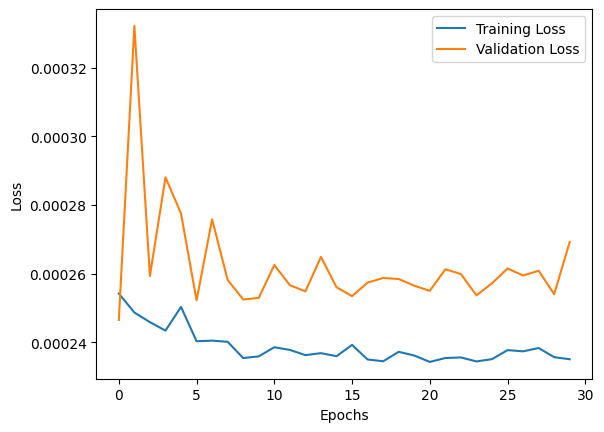

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for GRU RNN
sequence_length = 70  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20759)

# Reshape the data for GRU RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the GRU RNN model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
